In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sns.set()

import tensorflow as tf

In [2]:
# loading the data
file_path = 'data/'
# file_path = '/kaggle/input/digit-recognizer'
train = pd.read_csv(file_path+'train.csv')
test = pd.read_csv(file_path+'test.csv')

In [3]:
# converting pandas df to numpy array 
Y_train = train['label'].to_numpy()
X_train = train.drop(['label'],axis=1).to_numpy()

In [4]:
# current X_train is in shape of 42000, 784
print('Shape of X_train : ',X_train.shape)

# Just for preview we will convert it to 42000, 28, 28,
# as the actual pixel is 28x28
preview_train = X_train.reshape(42000,28,28X
print('Shape of preview_train : ',preview_train.shape)

Shape of X_train :  (42000, 784)
Shape of preview_train :  (42000, 28, 28)


#### Let's plot first 25 Images and corresponding label, just to make sure if we have the data in right order

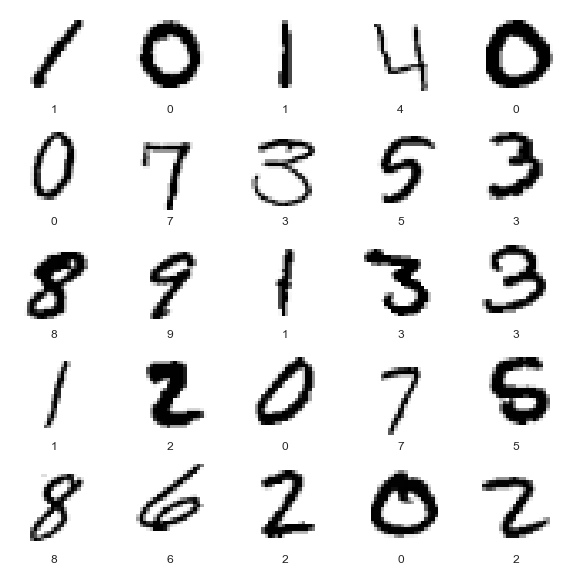

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preview_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

#### Let's split Train, Test and Validation data in 80:10:10

**Validation data** is not used for testing or used for training. It's used to validate the accuracy of your model in each epoch and help us tuning the hyperparameter

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [40]:
# taking 80% as train data 
x_train, x_test1, y_train, y_test1 = train_test_split(X_train, Y_train ,test_size=0.2, random_state=42)

# from 20% data, splitting 50% as test data and 50% as validation data
x_test, x_val, y_test, y_val = train_test_split(x_test1, y_test1 ,test_size=0.5, random_state=42)

print('Training data set size :', y_train.shape[0])
print('Test data set size :', y_test.shape[0])
print('Vlidation data set size :', y_val.shape[0])

Training data set size : 33600
Test data set size : 4200
Vlidation data set size : 4200


### Model Training 

In [80]:
# Created as a function so that we can try the same model with different number of epochs

def TrainKerasModel(n):
    
    
    model = tf.keras.Sequential() # creating model
    model.add(tf.keras.layers.Dense(128, activation='relu')) # first layer with 128 nodes
    model.add(tf.keras.layers.Dense(10)) # output layer with 10 nodes

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy']) 

    # model is training and summary is stored in history 
    history = model.fit(x_train, y_train, epochs=n, validation_data=((x_val,y_val))) 

    # fetching model accuracy and loss with train parameters 
    test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
    print('\nTest accuracy:', test_acc)
    return history, model



In [81]:
history, model = TrainKerasModel(4)

Train on 33600 samples, validate on 4200 samples
Epoch 1/4
33600/33600 [==============================] - 5s 146us/sample - loss: 0.2768 - accuracy: 0.9197 - val_loss: 0.1703 - val_accuracy: 0.9476
Epoch 2/4
33600/33600 [==============================] - 5s 139us/sample - loss: 0.1147 - accuracy: 0.9665 - val_loss: 0.1499 - val_accuracy: 0.9571
Epoch 3/4
33600/33600 [==============================] - 5s 142us/sample - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.1544 - val_accuracy: 0.9581
Epoch 4/4
33600/33600 [==============================] - 5s 139us/sample - loss: 0.0499 - accuracy: 0.9852 - val_loss: 0.1464 - val_accuracy: 0.9643
33600/1 - 2s - loss: 0.0211 - accuracy: 0.9908

Test accuracy: 0.9907738


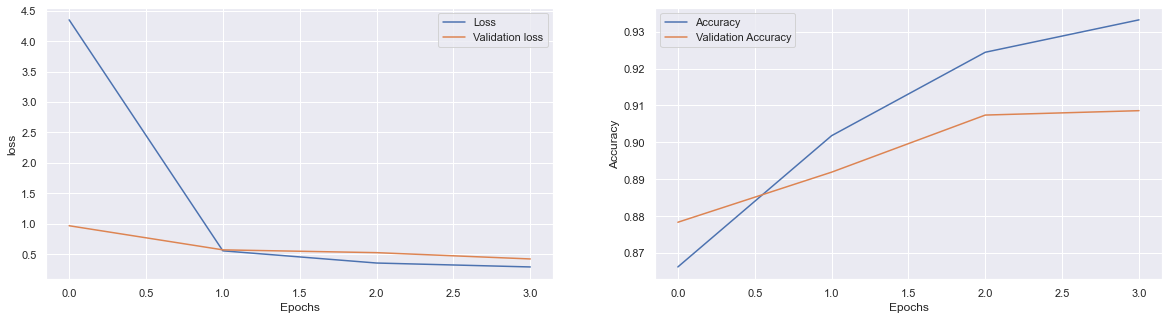

In [8]:
# plotting validation loss/Accuracy vs training loss/accuracy
def plotGraph():
    plt.figure(figsize=(20,5))

    plt.subplot(121)
    plt.plot(history.history['loss'], label="Loss")
    plt.plot(history.history['val_loss'], label="Validation loss")
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()


    plt.subplot(122)
    plt.plot(history.history['accuracy'], label="Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plotGraph()

Let's Try giving 50 Epochs, and see for results and we'll take the best number of epochs from there

In [11]:
history, model = TrainKerasModel(50)

Train on 33600 samples, validate on 4200 samples
Epoch 1/50
33600/33600 [==============================] - 6s 169us/sample - loss: 3.8867 - accuracy: 0.8518 - val_loss: 0.6924 - val_accuracy: 0.8738
Epoch 2/50
33600/33600 [==============================] - 5s 163us/sample - loss: 0.4928 - accuracy: 0.8985 - val_loss: 0.6317 - val_accuracy: 0.8860
Epoch 3/50
33600/33600 [==============================] - 6s 170us/sample - loss: 0.3537 - accuracy: 0.9171 - val_loss: 0.4906 - val_accuracy: 0.9043
Epoch 4/50
33600/33600 [==============================] - 5s 163us/sample - loss: 0.3122 - accuracy: 0.9266 - val_loss: 0.4023 - val_accuracy: 0.9119
Epoch 5/50
33600/33600 [==============================] - 4s 130us/sample - loss: 0.2709 - accuracy: 0.9336 - val_loss: 0.3595 - val_accuracy: 0.9190
Epoch 6/50
33600/33600 [==============================] - 5s 160us/sample - loss: 0.2517 - accuracy: 0.9370 - val_loss: 0.3741 - val_accuracy: 0.9217
Epoch 7/50
33600/33600 [===========================

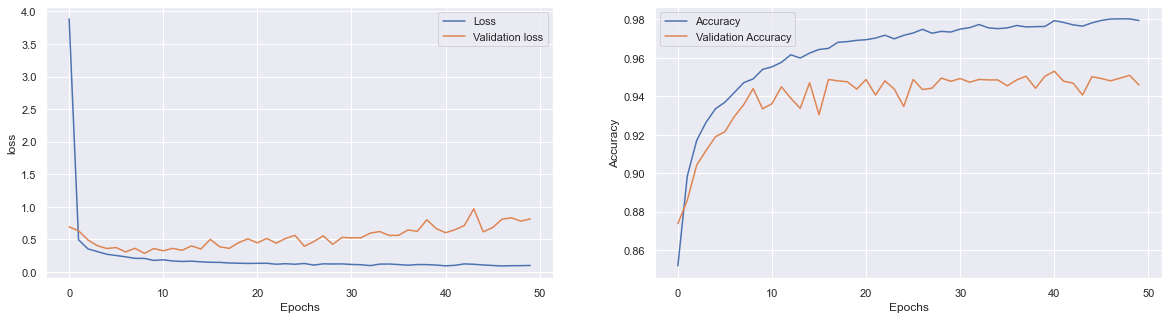

In [12]:
plotGraph()

From Graph we can take 9 as our epochs

In [30]:
history,model =  TrainKerasModel(9)

Train on 33600 samples, validate on 4200 samples
Epoch 1/9
33600/33600 [==============================] - 5s 153us/sample - loss: 4.3710 - accuracy: 0.8506 - val_loss: 0.7638 - val_accuracy: 0.8690
Epoch 2/9
33600/33600 [==============================] - 4s 128us/sample - loss: 0.5664 - accuracy: 0.8886 - val_loss: 0.5871 - val_accuracy: 0.8871
Epoch 3/9
33600/33600 [==============================] - 4s 126us/sample - loss: 0.3758 - accuracy: 0.9142 - val_loss: 0.4669 - val_accuracy: 0.8983
Epoch 4/9
33600/33600 [==============================] - 5s 137us/sample - loss: 0.3110 - accuracy: 0.9254 - val_loss: 0.3769 - val_accuracy: 0.9133
Epoch 5/9
33600/33600 [==============================] - 5s 134us/sample - loss: 0.2754 - accuracy: 0.9318 - val_loss: 0.3428 - val_accuracy: 0.9229
Epoch 6/9
33600/33600 [==============================] - 5s 159us/sample - loss: 0.2586 - accuracy: 0.9367 - val_loss: 0.3872 - val_accuracy: 0.9174
Epoch 7/9
33600/33600 [==============================] - 

In [79]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)

np.round(accuracy_score(y_test,y_pred),2)

0.96

In [82]:
final_test = test.to_numpy()
final_test = scaler.transform(final_test)
final_label = model.predict(final_test)
final_label = final_label.argmax(axis=-1)


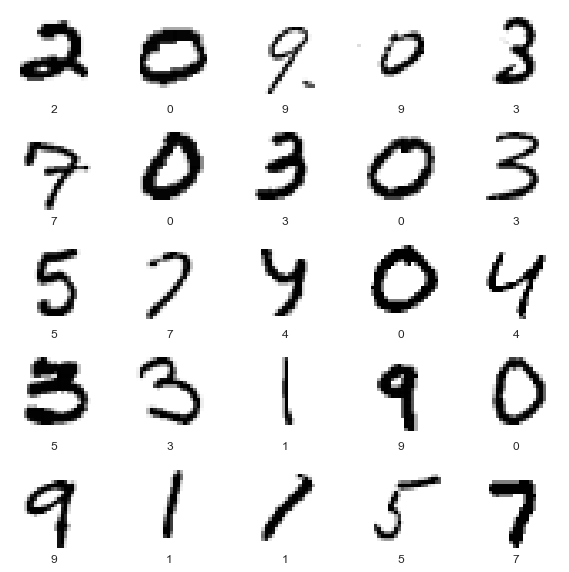

In [83]:
preview_test = test.to_numpy()
preview_test = preview_test.reshape(28000,28,28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preview_test[i], cmap=plt.cm.binary)
    plt.xlabel(final_label[i])
plt.show()